In [3]:
#install the modules
!pip install streamlit

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix

In [4]:
data=pd.read_csv("/content/Heart_Disease_Dataset.csv")

In [5]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,Yes,14.96,Yes,Yes,No,7,6,Yes,Female,25-29,White,Yes,Yes,Fair,17.1,Yes,Yes,Yes
1,Yes,36.93,Yes,Yes,No,3,10,No,Female,30-34,Hispanic,"No, borderline diabetes",Yes,Poor,2.7,Yes,No,No
2,No,18.70,Yes,No,Yes,26,15,No,Male,70-74,Hispanic,No,No,Poor,15.6,Yes,Yes,Yes
3,Yes,31.43,Yes,Yes,Yes,24,20,No,Female,40-44,American Indian/Alaskan Native,"No, borderline diabetes",No,Fair,1.4,No,No,Yes
4,Yes,75.64,No,No,Yes,2,29,No,Male,35-39,White,No,Yes,Excellent,8.8,Yes,Yes,Yes


In [6]:
#bottom rows
data.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
34383,Yes,68.45,Yes,No,No,0,16,No,Female,18-24,Black,"No, borderline diabetes",Yes,Good,18.7,No,Yes,Yes
34384,No,33.11,No,Yes,Yes,3,0,Yes,Female,35-39,Asian,Yes (during pregnancy),No,Fair,7.1,No,Yes,No
34385,No,52.32,No,No,No,23,14,No,Female,60-64,Other,Yes (during pregnancy),No,Good,15.4,Yes,Yes,No
34386,No,29.52,Yes,Yes,No,13,24,Yes,Female,55-59,American Indian/Alaskan Native,"No, borderline diabetes",Yes,Good,4.7,No,Yes,Yes
34387,Yes,88.59,Yes,Yes,Yes,9,7,No,Female,65-69,Asian,Yes (during pregnancy),No,NaN,NaN,NaN,NaN,NaN


In [7]:
data.shape

(34388, 18)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34388 entries, 0 to 34387
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      34388 non-null  object 
 1   BMI               34388 non-null  float64
 2   Smoking           34388 non-null  object 
 3   AlcoholDrinking   34388 non-null  object 
 4   Stroke            34388 non-null  object 
 5   PhysicalHealth    34388 non-null  int64  
 6   MentalHealth      34388 non-null  int64  
 7   DiffWalking       34388 non-null  object 
 8   Sex               34388 non-null  object 
 9   AgeCategory       34388 non-null  object 
 10  Race              34388 non-null  object 
 11  Diabetic          34388 non-null  object 
 12  PhysicalActivity  34388 non-null  object 
 13  GenHealth         34387 non-null  object 
 14  SleepTime         34387 non-null  float64
 15  Asthma            34387 non-null  object 
 16  KidneyDisease     34387 non-null  object

In [9]:
#statistical analysis
data.describe()


,BMI,PhysicalHealth,MentalHealth,SleepTime
count,34388.000000,34388.000000,34388.000000,34387.000000
mean,53.536576,14.522275,14.498662,12.455166
std,23.865633,8.641350,8.650309,6.637767
min,12.020000,0.000000,0.000000,1.000000
25%,33.010000,7.000000,7.000000,6.700000
50%,53.655000,15.000000,14.000000,12.400000
75%,74.122500,22.000000,22.000000,18.200000
max,94.850000,29.000000,29.000000,24.000000


In [10]:
data.isnull().sum()

,0
HeartDisease,0
BMI,0
Smoking,0
AlcoholDrinking,0
Stroke,0
PhysicalHealth,0
MentalHealth,0
DiffWalking,0
Sex,0
AgeCategory,0


In [11]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
34383,False
34384,False
34385,False
34386,False


In [12]:
len(data[data.duplicated()])

0

In [13]:
for column in data.columns:
  print(data[column].value_counts())

HeartDisease
No     17233
Yes    17155
Name: count, dtype: int64
BMI
71.52    15
68.17    13
54.83    13
43.15    13
67.95    12
         ..
23.35     1
79.30     1
58.04     1
53.87     1
45.16     1
Name: count, Length: 8152, dtype: int64
Smoking
Yes    17288
No     17100
Name: count, dtype: int64
AlcoholDrinking
Yes    17288
No     17100
Name: count, dtype: int64
Stroke
Yes    17269
No     17119
Name: count, dtype: int64
PhysicalHealth
8     1202
16    1202
14    1201
2     1190
23    1180
26    1176
6     1172
29    1168
12    1160
20    1159
24    1157
9     1152
1     1148
17    1143
19    1142
13    1141
3     1137
27    1137
15    1134
25    1133
11    1132
18    1130
28    1129
21    1128
5     1125
10    1125
7     1106
4     1101
0     1095
22    1083
Name: count, dtype: int64
MentalHealth
16    1187
22    1184
11    1183
8     1179
13    1179
18    1175
26    1168
3     1166
28    1165
5     1165
27    1164
10    1159
6     1156
2     1155
25    1154
1     1142
23    1142
9

In [14]:
lis=[2,34,4,5,6]
for i in lis:
  print(i)

2
34
4
5
6


In [15]:
data['Diabetic'].value_counts()

,count
Diabetic,
Yes (during pregnancy),8718
Yes,8589
No,8564
"No, borderline diabetes",8517


In [16]:
data=pd.get_dummies(data,columns=['Diabetic'],drop_first=True)
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,Yes,14.96,Yes,Yes,No,7,6,Yes,Female,25-29,White,Yes,Fair,17.1,Yes,Yes,Yes,False,True,False
1,Yes,36.93,Yes,Yes,No,3,10,No,Female,30-34,Hispanic,Yes,Poor,2.7,Yes,No,No,True,False,False
2,No,18.70,Yes,No,Yes,26,15,No,Male,70-74,Hispanic,No,Poor,15.6,Yes,Yes,Yes,False,False,False
3,Yes,31.43,Yes,Yes,Yes,24,20,No,Female,40-44,American Indian/Alaskan Native,No,Fair,1.4,No,No,Yes,True,False,False
4,Yes,75.64,No,No,Yes,2,29,No,Male,35-39,White,Yes,Excellent,8.8,Yes,Yes,Yes,False,False,False


In [17]:
##convert binary categorical variables into numerical columns
binary_columns=["Smoking","AlcoholDrinking","Stroke","DiffWalking",'PhysicalActivity',"Asthma",'KidneyDisease', 'SkinCancer']
for col in binary_columns:
    data[col]=data[col].map({'Yes':1,"No":0})

In [18]:
data=pd.get_dummies(data,columns=['Sex','AgeCategory','Race','GenHealth'],drop_first=True)
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,PhysicalActivity,SleepTime,...,AgeCategory_80 or older,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,Yes,14.96,1,1,0,7,6,1,1,17.1,...,False,False,False,False,False,True,True,False,False,False
1,Yes,36.93,1,1,0,3,10,0,1,2.7,...,False,False,False,True,False,False,False,False,True,False
2,No,18.70,1,0,1,26,15,0,0,15.6,...,False,False,False,True,False,False,False,False,True,False
3,Yes,31.43,1,1,1,24,20,0,0,1.4,...,False,False,False,False,False,False,True,False,False,False
4,Yes,75.64,0,0,1,2,29,0,1,8.8,...,False,False,False,False,False,True,False,False,False,False


In [19]:
data.isnull().sum()

,0
HeartDisease,0
BMI,0
Smoking,0
AlcoholDrinking,0
Stroke,0
PhysicalHealth,0
MentalHealth,0
DiffWalking,0
PhysicalActivity,0
SleepTime,1


In [20]:
#X,target
X=data.drop(columns=['HeartDisease'],axis=1)
y=data['HeartDisease'].map({'Yes':1,'No':0})

In [21]:


#train-test-splitting
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
#initialize the model
clf=DecisionTreeClassifier(max_depth=5,criterion='gini',random_state=42)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [23]:
#make the prediction
y_pred=clf.predict(X_test)

In [24]:
#evalute the model
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
roc_score=roc_auc_score(y_test,y_pred)

Accuracy: 0.5157022390229717
Precision: 0.5194157463484147
Recall: 0.4238372093023256
F1 Score: 0.46678405634704656
ROC AUC Score: 0.5157289595086381


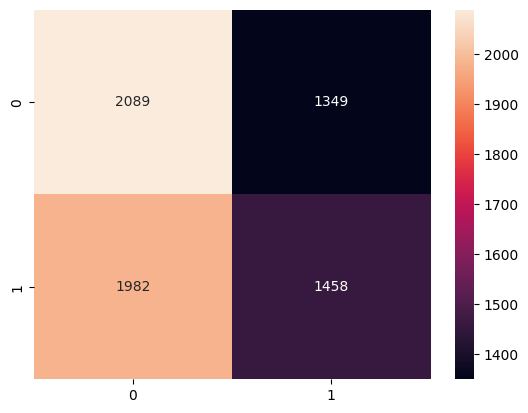

In [25]:
#print metrics
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1 Score:",f1)
print("ROC AUC Score:",roc_score)
#confusion matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

In [31]:
%%writefile app.py

import streamlit as st
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Load and preprocess the dataset
data = pd.read_csv('/content/Heart_Disease_Dataset.csv')  # Replace with your actual dataset path

# Preprocessing steps
binary_columns = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']
for col in binary_columns:
    data[col] = data[col].map({'Yes': 1, 'No': 0})

# One-hot encode categorical columns
data = pd.get_dummies(data, columns=['Sex', 'AgeCategory', 'Race', 'GenHealth', 'Diabetic'], drop_first=True)

# Define features and target
X = data.drop(columns=['HeartDisease'])
y = data['HeartDisease'].map({'Yes': 1, 'No': 0})

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
# Function to make predictions
def predict_heart_disease(input_data):
    # Create a DataFrame with the input data
    input_df = pd.DataFrame([input_data], columns=X.columns)

    # Ensure all columns are present (fill missing columns with 0)
    for col in X.columns:
        if col not in input_df.columns:
            input_df[col] = 0

    # Reorder columns to match the model's expectations
    input_df = input_df[X.columns]

    # Make prediction
    prediction = clf.predict(input_df)
    return "Yes" if prediction[0] == 1 else "No"

# Streamlit app
st.title("Heart Disease Prediction")
# Input fields
bmi = st.number_input("BMI", min_value=0.0, max_value=100.0, value=25.0)
smoking = st.selectbox("Smoking", [0, 1])
alcohol_drinking = st.selectbox("Alcohol Drinking", [0, 1])
stroke = st.selectbox("Stroke", [0, 1])
physical_health = st.number_input("Physical Health (Days Not Good in Past 30)", min_value=0, max_value=30, value=0)
mental_health = st.number_input("Mental Health (Days Not Good in Past 30)", min_value=0, max_value=30, value=0)
diff_walking = st.selectbox("Difficulty Walking", [0, 1])
sex = st.selectbox("Sex", ["Female", "Male"])
age_category = st.selectbox("Age Category", ["25-29", "30-34", "35-39", "40-44", "50-54", "70-74"])
race = st.selectbox("Race", ["White", "Hispanic", "Black", "Asian", "American Indian/Alaskan Native"])
diabetic = st.selectbox("Diabetic Status", ["No", "No, borderline diabetes", "Yes (during pregnancy)", "Yes"])
physical_activity = st.selectbox("Physical Activity", [0, 1])
gen_health = st.selectbox("General Health", ["Poor", "Fair", "Good", "Very Good", "Excellent"])
sleep_time = st.number_input("Sleep Time (Hours)", min_value=0, max_value=24, value=7)
asthma = st.selectbox("Asthma", [0, 1])
kidney_disease = st.selectbox("Kidney Disease", [0, 1])
skin_cancer = st.selectbox("Skin Cancer", [0, 1])
# Prepare input data
input_data = {
    'BMI': bmi,
    'Smoking': smoking,
    'AlcoholDrinking': alcohol_drinking,
    'Stroke': stroke,
    'PhysicalHealth': physical_health,
    'MentalHealth': mental_health,
    'DiffWalking': diff_walking,
    'Sex_Male': 1 if sex == "Male" else 0,
    'AgeCategory_30-34': 1 if age_category == "30-34" else 0,
    'AgeCategory_35-39': 1 if age_category == "35-39" else 0,
    'AgeCategory_40-44': 1 if age_category == "40-44" else 0,
    'AgeCategory_50-54': 1 if age_category == "50-54" else 0,
    'AgeCategory_70-74': 1 if age_category == "70-74" else 0,
    'Race_Hispanic': 1 if race == "Hispanic" else 0,
    'Race_Black': 1 if race == "Black" else 0,
    'Race_Asian': 1 if race == "Asian" else 0,
    'Race_American Indian/Alaskan Native': 1 if race == "American Indian/Alaskan Native"
    else 0,
    'Diabetic_No, borderline diabetes': 1 if diabetic == "No, borderline diabetes" else 0,
    'Diabetic_Yes (during pregnancy)': 1 if diabetic == "Yes (during pregnancy)" else 0,
    'Diabetic_Yes': 1 if diabetic == "Yes" else 0,
    'PhysicalActivity': physical_activity,
    'GenHealth_Fair': 1 if gen_health == "Fair" else 0,
    'GenHealth_Good': 1 if gen_health == "Good" else 0,
    'GenHealth_Very Good': 1 if gen_health == "Very Good" else 0,
    'GenHealth_Excellent': 1 if gen_health == "Excellent" else 0,
    'SleepTime': sleep_time,
    'Asthma': asthma,
    'KidneyDisease': kidney_disease,
    'SkinCancer': skin_cancer
}

# Predict button
if st.button("Predict"):
    result = predict_heart_disease(input_data)
    st.write(f"Heart Disease Prediction: {result}")



Overwriting app.py


In [27]:
! wget -q -O - ipv4.icanhazip.com  ##for getting the code

35.224.157.66


In [ ]:
##run streamlit
!streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸⠼⠴⠦
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.224.157.66:8501

⠧⠇⠏⠋⠙⠹your url is: https://fluffy-rats-lead.loca.lt
